In [104]:
import pandas as pd

In [105]:
path = "Resources/players_fifa22.csv"

In [106]:
df = pd.read_csv(path)

In [107]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [108]:
name = new_df.corr()

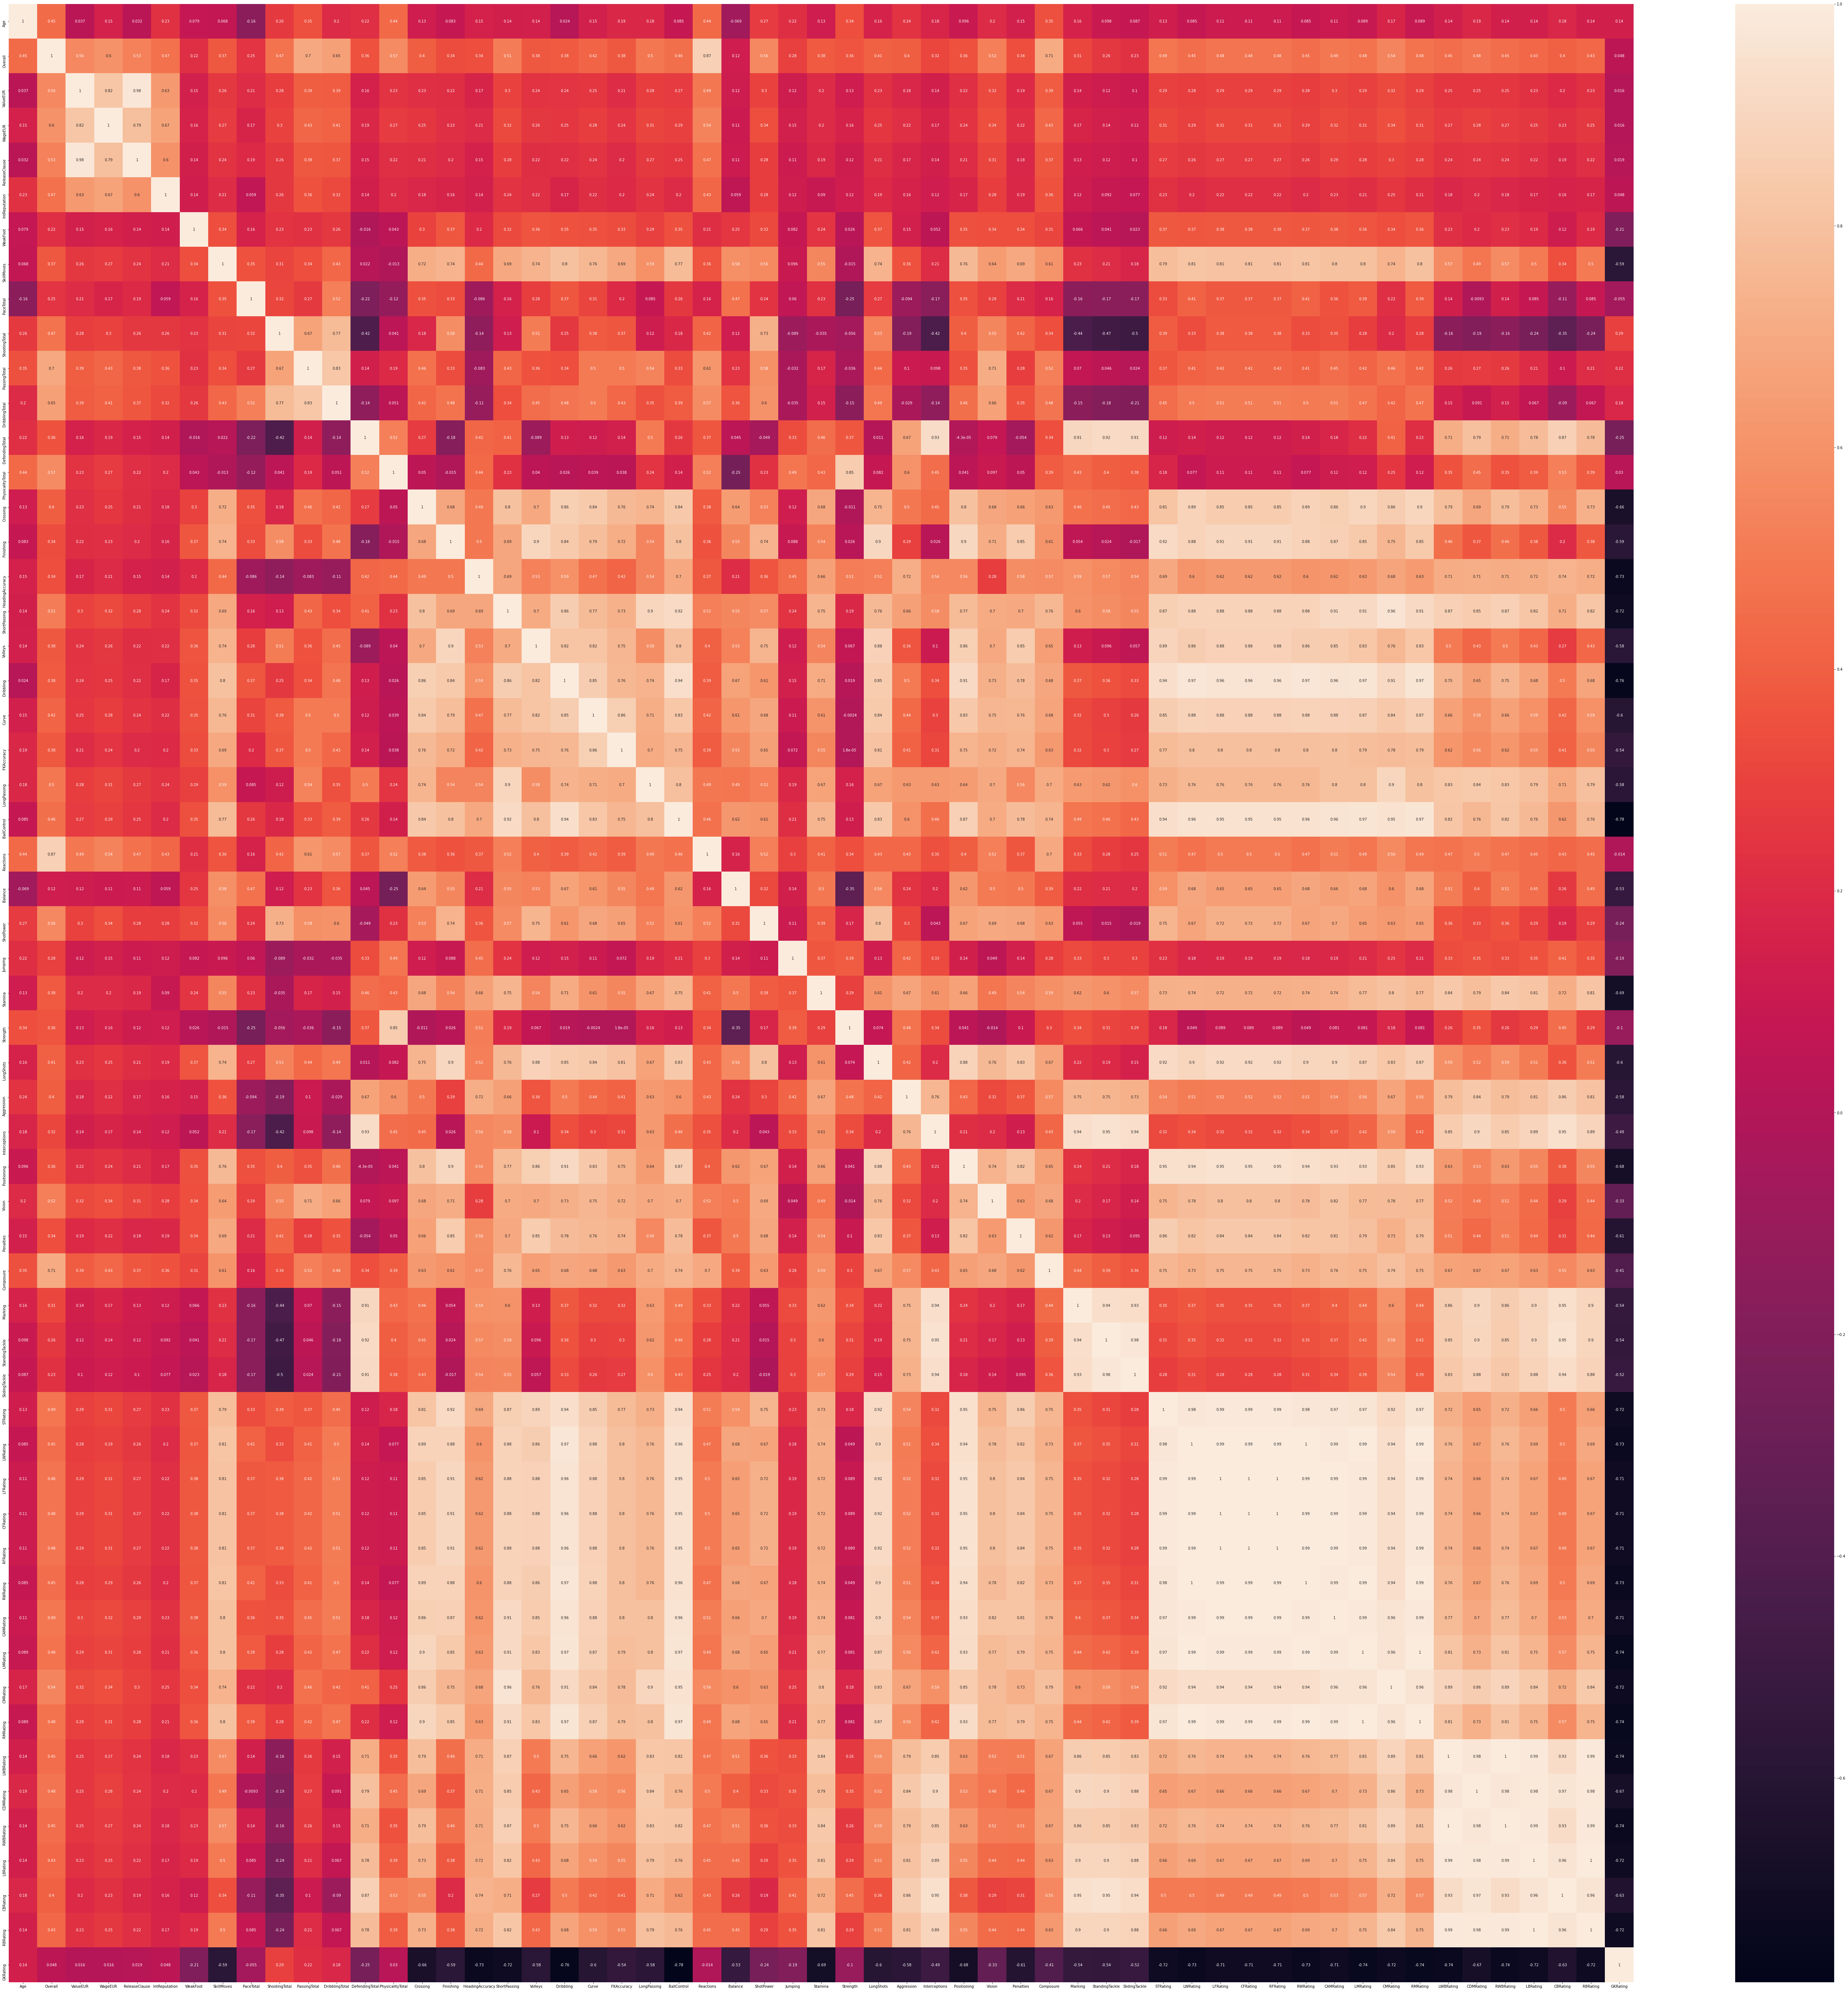

In [131]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(100,100))
sn.heatmap(name, annot=True)  
plt.savefig("CorrelationHeatMap.png")
plt.show()

In [264]:
columns_to_drop = ['Positions', 'BestPosition', 'Club', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'ID', 'Name', 'FullName', 'PhotoUrl',
       'Nationality', 'GKRating', 'SlidingTackle', 'StandingTackle', 
        'Marking', 'Penalties', 'Positioning', 'Interceptions', 'Aggression', 
        'Strength', 'Stamina', 'Jumping', 'Balance', 'FKAccuracy', 'Dribbling', 
        'Volleys', 'HeadingAccuracy', 'Finishing', 'DefendingTotal', 'PaceTotal', 'SkillMoves', 'WeakFoot']

In [265]:
new_df = df.drop(columns=columns_to_drop)

In [266]:
new_df.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,...,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating
0,34,170,72,93,93,0,2219,462,78000000,320000,...,93,93,90,93,69,67,69,64,53,64
1,32,185,81,92,92,0,2212,460,119500000,270000,...,89,87,83,87,67,69,67,64,63,64
2,36,187,83,91,91,0,2208,457,45000000,270000,...,89,89,81,89,66,62,66,63,56,63
3,22,182,73,91,95,4,2175,470,194000000,230000,...,92,92,84,92,70,66,70,66,57,66
4,28,188,87,91,93,2,1413,489,112000000,130000,...,41,38,41,38,35,39,35,35,36,35


In [267]:
new_df.columns

Index(['Age', 'Height', 'Weight', 'Overall', 'Potential', 'Growth',
       'TotalStats', 'BaseStats', 'ValueEUR', 'WageEUR', 'ReleaseClause',
       'PreferredFoot', 'IntReputation', 'AttackingWorkRate',
       'DefensiveWorkRate', 'ShootingTotal', 'PassingTotal', 'DribblingTotal',
       'PhysicalityTotal', 'Crossing', 'ShortPassing', 'Curve', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'ShotPower', 'LongShots', 'Vision', 'Composure', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating'],
      dtype='object')

In [268]:
new_df2=pd.get_dummies(new_df)

In [269]:
new_df2=new_df2.dropna()

In [270]:
y = new_df2["Overall"]
X = new_df2.drop(columns="Overall")
X

,Age,Height,Weight,Potential,Growth,TotalStats,BaseStats,ValueEUR,WageEUR,ReleaseClause,...,CBRating,RBRating,PreferredFoot_Left,PreferredFoot_Right,AttackingWorkRate_High,AttackingWorkRate_Low,AttackingWorkRate_Medium,DefensiveWorkRate_High,DefensiveWorkRate_Low,DefensiveWorkRate_Medium
0,34,170,72,93,0,2219,462,78000000,320000,144300000,...,53,64,1,0,0,0,1,0,1,0
1,32,185,81,92,0,2212,460,119500000,270000,197200000,...,63,64,0,1,1,0,0,0,0,1
2,36,187,83,91,0,2208,457,45000000,270000,83300000,...,56,63,0,1,1,0,0,0,1,0
3,22,182,73,95,4,2175,470,194000000,230000,373500000,...,57,66,0,1,1,0,0,0,1,0
4,28,188,87,93,2,1413,489,112000000,130000,238000000,...,36,35,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,19,180,75,62,14,1160,246,100000,500,218000,...,50,47,0,1,0,0,1,0,0,1
19256,23,196,85,52,4,964,285,50000,1000,81000,...,26,26,0,1,0,0,1,0,0,1
19257,20,183,77,55,7,1166,247,90000,1000,158000,...,50,48,0,1,0,0,1,0,0,1
19258,20,174,69,58,10,1198,250,100000,950,175000,...,50,49,0,1,0,0,1,0,0,1


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [273]:
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [274]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [275]:
clf.score(X_test_scaled, y_test)

0.8047767393561787